# Orbit Homework

Corinne Wilklow


In [24]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import numpy as np

print('done')

done


### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [25]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [106]:
# And an inition condition (with everything in SI units)

#r_0 = 147e9 * m
G = 6.674e-11 * N / kg**2 * m**2

m1 = 1.989e30 * kg #mass of sun
m2 = 5.972e24 * kg #mass of earth

t_0 = 0 * s
t_end = 1e7 *s

x_0 = 0 * m
y_0 = 147e9 * m
vx_0 = 0 * m/s
vy_0 = -5e3 * m/s

init = State(x = x_0, y = y_0 , vx = vx_0, vy = vy_0)

,values
x,0 meter
y,147000000000.0 meter
vx,0.0 meter / second
vy,-5000.0 meter / second


In [107]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=G,
                m1=m1,
                r_final=r_sun + r_earth,
                m2=m2,
                t_0=t_0,
                t_end=t_end)

,values
init,x 0 meter y 147000000...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [108]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    r = Vector(x,y)
    angle = r.angle
    force = G * m1 * m2 / r.mag**2 
    
    fx, fy = pol2cart(angle, force)
    Force = Vector(fx,fy)
    return Force

In [109]:
test = Vector(1,1)
test.mag
test.angle

<Quantity(0.7853981633974483, 'radian')>

In [110]:
universal_gravitation(init, system)

<Quantity([2.24639938e+06 3.66864860e+22], 'newton')>

In [111]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)
    
    v = Vector(vx,vy)

    force = universal_gravitation(state, system)
    
    dxdt = vx
    dydt = vy
    print(v.x)
    
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    print(force.x)
    
    return dxdt, dydt, dvxdt, dvydt

In [112]:
# Always test the slope function!

slope_func(init, 0, system)

0.0 meter / second
2246399.3824401917 newton


(<Quantity(0.0, 'meter / second')>,
 <Quantity(-5000.0, 'meter / second')>,
 <Quantity(-3.761552884193221e-19, 'newton / kilogram')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>)

In [113]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    r = Vector(x,y)
    return r.y - system.r_final

In [114]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [115]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

0.0 dimensionless
2246399.3824401917 meter ** 2 * newton
-4.328122428893945e-15 dimensionless
2248158.751753921 meter ** 2 * newton
-1.3142762167417102e-19 dimensionless
2246399.435833782 meter ** 2 * newton
-1.9714143602557666e-19 dimensionless
2246399.4625306036 meter ** 2 * newton
-5.257105116874329e-19 dimensionless
2246399.5960147455 meter ** 2 * newton
-5.841227938491187e-19 dimensionless
2246399.619745277 meter ** 2 * newton
-6.571381474189228e-19 dimensionless
2246399.6494084466 meter ** 2 * newton
-6.571381474188862e-19 dimensionless
2246399.6494084466 meter ** 2 * newton
-1.9714145203527816e-18 dimensionless
2246400.183345672 meter ** 2 * newton
-2.6285530582526164e-18 dimensionless
2246400.4503169344 meter ** 2 * newton
-5.914246138260331e-18 dimensionless
2246401.785176826 meter ** 2 * newton
-6.4983695569109574e-18 dimensionless
2246402.022486876 meter ** 2 * newton
-7.228523916963831e-18 dimensionless
2246402.319125128 meter ** 2 * newton
-7.228523916927781e-18 dimensionl

1.8732854815914167e-10 dimensionless
-667820324193.2003 meter ** 2 * newton
6.145067111010996e-11 dimensionless
-51774158351.464134 meter ** 2 * newton
6.47160214823943e-11 dimensionless
-56780731047.25068 meter ** 2 * newton
8.431734606265477e-11 dimensionless
-160373988071.6069 meter ** 2 * newton
7.863727558026934e-11 dimensionless
-187590364002.32983 meter ** 2 * newton
9.282725348707292e-11 dimensionless
-226428178899.0951 meter ** 2 * newton
1.11670080425627e-10 dimensionless
-218513860605.07965 meter ** 2 * newton
1.4278391518355173e-10 dimensionless
-380301263251.0208 meter ** 2 * newton
1.8425705961620407e-10 dimensionless
-819376848574.1011 meter ** 2 * newton
1.3271019395844744e-09 dimensionless
53773728453.99132 meter ** 2 * newton
3.172719667509531e-09 dimensionless
-196899156307.96646 meter ** 2 * newton
2.788371113963902e-09 dimensionless
-2993074528114.9116 meter ** 2 * newton
5.968415080545276e-10 dimensionless
198562169191.58588 meter ** 2 * newton
1.2419421611680257e

,values
sol,None
t_events,[[4718237.931762392]]
nfev,200
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [116]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(4718237.931762392, 'second')>

In [117]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(54.609235321323965, 'day')>

In [118]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

0.0 dimensionless
2246399.3824401917 meter ** 2 * newton
-4.328122428893945e-15 dimensionless
2248158.751753921 meter ** 2 * newton
-1.3142762167417102e-19 dimensionless
2246399.435833782 meter ** 2 * newton
-1.9714143602557666e-19 dimensionless
2246399.4625306036 meter ** 2 * newton
-5.257105116874329e-19 dimensionless
2246399.5960147455 meter ** 2 * newton
-5.841227938491187e-19 dimensionless
2246399.619745277 meter ** 2 * newton
-6.571381474189228e-19 dimensionless
2246399.6494084466 meter ** 2 * newton
-6.571381474188862e-19 dimensionless
2246399.6494084466 meter ** 2 * newton
-1.9714145203527816e-18 dimensionless
2246400.183345672 meter ** 2 * newton
-2.6285530582526164e-18 dimensionless
2246400.4503169344 meter ** 2 * newton
-5.914246138260331e-18 dimensionless
2246401.785176826 meter ** 2 * newton
-6.4983695569109574e-18 dimensionless
2246402.022486876 meter ** 2 * newton
-7.228523916963831e-18 dimensionless
2246402.319125128 meter ** 2 * newton
-7.228523916927781e-18 dimensionl

7.203468128324744e-11 dimensionless
-123664470256.5807 meter ** 2 * newton
1.106542521580959e-10 dimensionless
-199627743104.03915 meter ** 2 * newton
5.610401405114204e-10 dimensionless
60522968699.53279 meter ** 2 * newton
1.2251998369107056e-09 dimensionless
101856482600.6472 meter ** 2 * newton
1.0683770247982784e-09 dimensionless
350271291859.93353 meter ** 2 * newton
1.2819719897594427e-10 dimensionless
43205217300.93076 meter ** 2 * newton
6.302993710704258e-11 dimensionless
-54783750226.369896 meter ** 2 * newton
6.78736653731429e-11 dimensionless
-62485356589.50675 meter ** 2 * newton
1.0001282072694374e-10 dimensionless
-255422978309.84576 meter ** 2 * newton
8.1360978895249e-11 dimensionless
-353387564972.9916 meter ** 2 * newton
1.046189891173915e-10 dimensionless
-756556677797.6373 meter ** 2 * newton
1.8732854815914167e-10 dimensionless
-667820324193.2003 meter ** 2 * newton
6.145067111010996e-11 dimensionless
-51774158351.464134 meter ** 2 * newton
6.47160214823943e-11 d

In [119]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [120]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

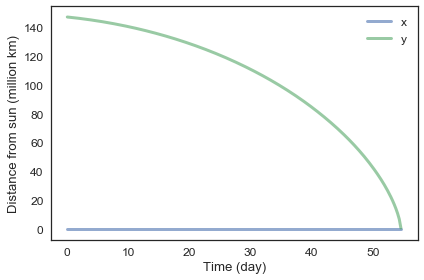

In [121]:
# And plotting

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')